**Assignment 3**

Name    : Ashmika Gupte

Roll no : 33228




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats
import seaborn as sns
%matplotlib inline

In [ ]:
path ="/content/drive/MyDrive/Bwt.csv"
df=pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284,0,27,62,100,0
1,2,113,282,0,33,64,135,0
2,3,128,279,0,28,64,115,1
3,4,108,282,0,23,67,125,1
4,5,136,286,0,25,62,93,0


In [ ]:
df=df.drop(['Unnamed: 0'], axis = 1)
df

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0
...,...,...,...,...,...,...,...
1169,113,275,1,27,60,100,0
1170,128,265,0,24,67,120,0
1171,130,291,0,30,65,150,1
1172,125,281,1,21,65,110,0


In [ ]:
df.describe()

,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bwt        1174 non-null   int64
 1   gestation  1174 non-null   int64
 2   parity     1174 non-null   int64
 3   age        1174 non-null   int64
 4   height     1174 non-null   int64
 5   weight     1174 non-null   int64
 6   smoke      1174 non-null   int64
dtypes: int64(7)
memory usage: 64.3 KB


**Testing the association of mother’s (age) age and baby’s birth weight (bwt) using the correlation test and linear regression :**

In [ ]:
cor=df['age'].corr(df['bwt'])
print("Correlation between age and bwt : ",cor)

Correlation between age and bwt :  0.026982911002929492


The correlation value is greater than 0. Therefore there's positive correlation between age and bwt.

Coefficients:  [[0.15538372]]
Variance score:  -0.003900392848344092


Text(0.5, 1.0, 'Residual errors')

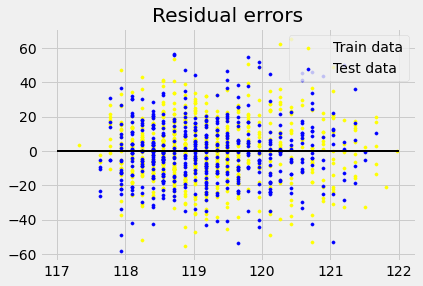

In [ ]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

X=np.array(df['age']).reshape(-1,1)
y=np.array(df['bwt']).reshape(-1,1)

  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)
  
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)
print('Variance score: ',reg.score(X_test, y_test))
  
#plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "yellow", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 117, xmax = 122, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  